In [39]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import json
import pandas as pd
import matplotlib.pyplot as plt

class BaseData:
    def __init__(self, x, y, shift=False):
        self.x = x
        self.y = y
        order = np.argsort(x)
        self.x = x[order]
        self.y = y[order]
        if shift:
            self.y -= np.mean(self.y[:3])
    
    def __repr__(self):
        return f"BD(x={self.x}, y={self.y})"

class LillianData:
    def __init__(self, path, shift=False):
        self.load_data(path, shift)
    
    def load_data(self, path, shift=False):
        df_raw = pd.read_csv(path)
        i = 0
        while i < len(df_raw.keys()):
            key = df_raw.keys()[i]
            next_key = df_raw.keys()[i + 1]
            x = df_raw[key].values[1:].astype(float)
            y = df_raw[next_key].values[1:].astype(float)
            mask = ~np.isnan(x) & ~np.isnan(y)
            setattr(self, key, BaseData(
                x[mask],
                y[mask],
                shift=shift,
            ))
            i += 2

    def keys(self):
        return [key for key in self.__dict__.keys() if not key.startswith('_')]
    
    def __repr__(self):
        return f"LD(keys={self.keys()})"


root = '/home/mmccraw/dev/data/09-30-25/lillian-data-manual/'

g_r_smooth = LillianData(os.path.join(root, 'lillian_smooth_gr.csv'), shift=True)
g_r_rough = LillianData(os.path.join(root, 'lillian_rough_gr.csv'), shift=True)

In [40]:
g_r_rough.keys(), g_r_smooth.keys()

(['red', 'orange', 'green', 'blue', 'purple', 'black'],
 ['red', 'orange', 'green', 'light blue', 'blue', 'maroon'])

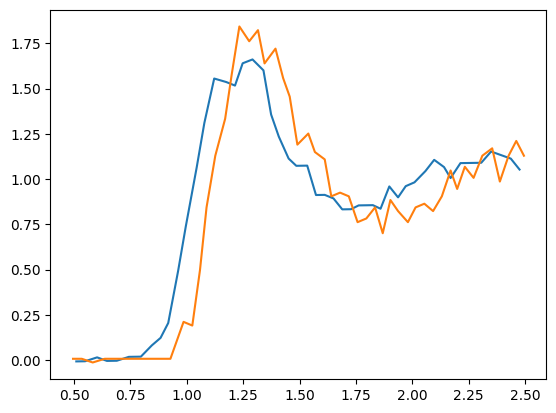

In [42]:
plt.plot(g_r_rough.red.x, g_r_rough.red.y)
plt.plot(g_r_smooth.red.x, g_r_smooth.red.y)